In [1]:
import pandas as pd
sales=pd.read_csv('sales.csv')
sales.head()

,Invoice ID,Date,Time,Gender,Location,City,Member,Category,Price,Quantity,Total,Payment,Rating
0,460489604,1/25/2018,16:46,Male,Brookfield,NewYork,Yes,Groceries,30,1,30,Cash,2
1,471006167,3/19/2018,16:48,Female,Water tower,Chicago,Yes,Fashion,35,5,175,Card,3
2,411909258,2/25/2018,13:33,Male,Water tower,Chicago,No,Clothing,57,2,114,Cash,5
3,487313402,1/22/2018,13:38,Female,Park lane,Dallas,Yes,Sporting,89,4,356,Gpay,1
4,197763430,2/18/2018,15:31,Female,Park lane,Dallas,No,Books,82,5,410,Cash,4


In [2]:
sales['Category'].unique()

array(['Groceries', 'Fashion', 'Clothing', 'Sporting', 'Books',
       'Furniture'], dtype=object)

In [3]:
sales.shape

(1000, 13)

In [4]:
sales.isnull().sum()

Invoice ID    0
Date          0
Time          0
Gender        0
Location      0
City          0
Member        0
Category      0
Price         0
Quantity      0
Total         0
Payment       0
Rating        0
dtype: int64

In [5]:
sales[sales['Gender']=='Male'].shape

(499, 13)

In [6]:
sales[sales['Total']>500].shape

(78, 13)

In [7]:
sales['Payment'].unique()

array(['Cash', 'Card', 'Gpay'], dtype=object)

In [8]:
sales.sum()['Total']

207788

In [9]:
sales.max()

Invoice ID      999665753
Date             3/9/2018
Time                20:59
Gender               Male
Location      Water tower
City              NewYork
Member                Yes
Category         Sporting
Price                 100
Quantity                7
Total                 693
Payment              Gpay
Rating                  5
dtype: object

In [10]:
sales.min()

Invoice ID        661405
Date            1/1/2018
Time               10:00
Gender            Female
Location      Brookfield
City             Chicago
Member                No
Category           Books
Price                  1
Quantity               1
Total                  1
Payment             Card
Rating                 1
dtype: object

In [11]:
sales.mean()['Total']

207.788

In [12]:
sales.groupby('City').sum()['Total']

City
Chicago    65215
Dallas     70432
NewYork    72141
Name: Total, dtype: int64

In [13]:
sales.groupby('Date').sum()['Total'].tail()

Date
3/5/2018    4616
3/6/2018    1915
3/7/2018    1048
3/8/2018    2638
3/9/2018    4300
Name: Total, dtype: int64

In [14]:
sales.groupby('Category').sum()['Total']

Category
Books        36103
Clothing     35925
Fashion      32778
Furniture    34141
Groceries    31236
Sporting     37605
Name: Total, dtype: int64

#### 1. Which location has highest & lowest sales? Represent the sales on a bar chart, also show the market share for each location using a pie chart.

In [15]:
sales.groupby('Location').sum()['Total']

Location
Brookfield     72141
Park lane      70432
Water tower    65215
Name: Total, dtype: int64

 Brookfield has highest sales; Water tower has lowest sales

<BarContainer object of 3 artists>

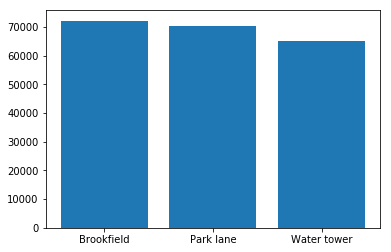

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
location_list=sales.groupby('Location')
location=[x for x,y in location_list]
plt.bar(location,sales.groupby('Location').sum()['Total'])

([<matplotlib.patches.Wedge at 0x193f7e48>,
 [Text(0.508036,0.975653,'Brookfield'),
  Text(-1.09397,-0.114977,'Park lane'),
  Text(0.607232,-0.917207,'Water tower')],
 [Text(0.27711,0.532175,'34.72%'),
  Text(-0.596713,-0.0627146,'33.90%'),
  Text(0.331218,-0.500295,'31.39%')])

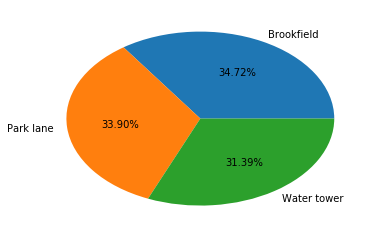

In [17]:
plt.pie(sales.groupby('Location').sum()['Total'],labels=location,autopct='%.2f%%')

#### 2. which location has more female customers and male customers?

In [18]:
sales.groupby(['Gender','Location']).count()['Invoice ID'].unstack(level=0)

Gender,Female,Male
Location,,
Brookfield,179,161
Park lane,179,153
Water tower,143,185


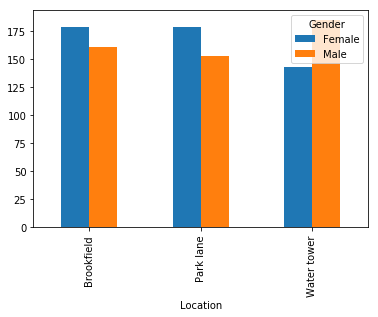

In [19]:
sales.groupby(['Gender','Location']).count()['Invoice ID'].unstack(level=0).plot(kind='bar')

 Brookfield and Park lane has more female customers; Water tank has more male customers.

#### 3. what days of the month make more sales? 

In [20]:
sales['Day']=pd.to_datetime(sales['Date']).dt.day
sales.head()

,Invoice ID,Date,Time,Gender,Location,City,Member,Category,Price,Quantity,Total,Payment,Rating,Day
0,460489604,1/25/2018,16:46,Male,Brookfield,NewYork,Yes,Groceries,30,1,30,Cash,2,25
1,471006167,3/19/2018,16:48,Female,Water tower,Chicago,Yes,Fashion,35,5,175,Card,3,19
2,411909258,2/25/2018,13:33,Male,Water tower,Chicago,No,Clothing,57,2,114,Cash,5,25
3,487313402,1/22/2018,13:38,Female,Park lane,Dallas,Yes,Sporting,89,4,356,Gpay,1,22
4,197763430,2/18/2018,15:31,Female,Park lane,Dallas,No,Books,82,5,410,Cash,4,18


In [21]:
day_sales=sales.groupby('Day').sum()['Total']
day_sales

Day
1     6301
2     8247
3     8533
4     6593
5     9177
6     5976
7     6164
8     8313
9     9142
10    6444
11    4755
12    7714
13    5688
14    7978
15    9677
16    5912
17    5833
18    4625
19    7481
20    7333
21    4300
22    5788
23    6949
24    7819
25    8638
26    7165
27    8154
28    6467
29    4662
30    3530
31    2430
Name: Total, dtype: int64

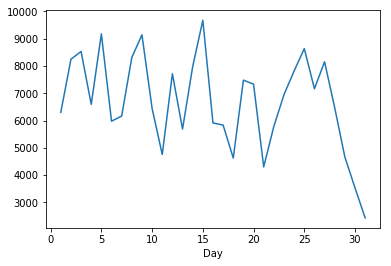

In [22]:
sales.groupby('Day').sum()['Total'].plot()

 day 15 of the month make more sales

#### 4. which branch has more members vs less members?

In [23]:
sales.groupby(['Member','Location']).count()['Invoice ID'].unstack(level=0)

Member,No,Yes
Location,,
Brookfield,173,167
Park lane,167,165
Water tower,159,169


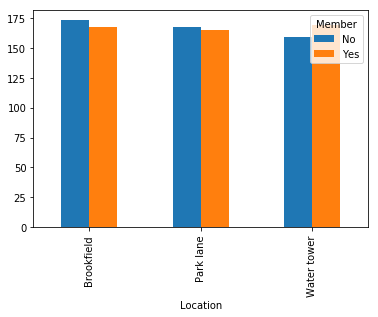

In [24]:
sales.groupby(['Member','Location']).count()['Invoice ID'].unstack(level=0).plot(kind='bar')

 Member more in Water tower and less in Park lane

#### 5. which branch has largest and lowest rating?

In [25]:
sales.groupby('Location').mean()['Rating']

Location
Brookfield     2.782353
Park lane      3.021084
Water tower    3.118902
Name: Rating, dtype: float64

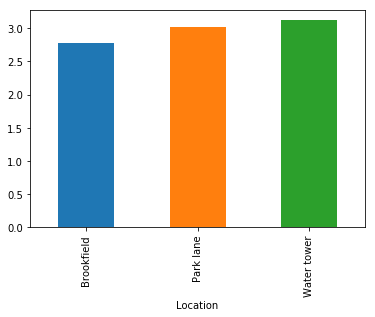

In [26]:
sales.groupby('Location').mean()['Rating'].plot(kind='bar')

 water tower has largest rating and brookfield has lowest rating

#### 6. which city has more female shoping?

In [27]:
sales.groupby(['Gender','City']).count()['Invoice ID'].unstack(level=0)

Gender,Female,Male
City,,
Chicago,143,185
Dallas,179,153
NewYork,179,161


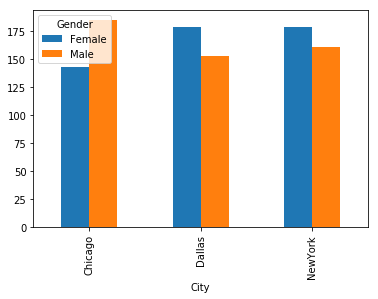

In [28]:
sales.groupby(['Gender','City']).count()['Invoice ID'].unstack(level=0).plot(kind='bar')

 NewYork and Dallas has more female shopping

#### 7. who spend more male or female?

In [29]:
sales.groupby('Gender').sum()['Total']

Gender
Female    106452
Male      101336
Name: Total, dtype: int64

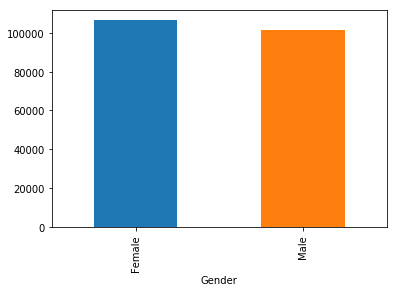

In [30]:
sales.groupby('Gender').sum()['Total'].plot(kind='bar')

female spends more

#### 8. which type of customer spends more, member or non member?

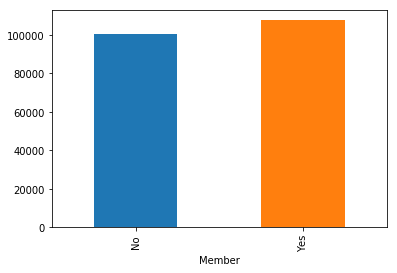

In [31]:
sales.groupby(['Member']).sum()['Total'].plot('bar')

member spends more

#### 9. which product line sells more?

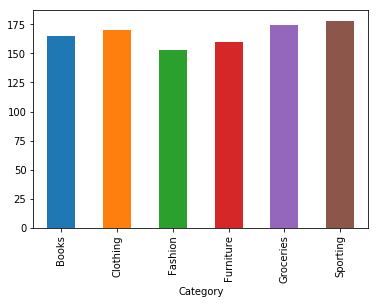

In [32]:
sales.groupby(['Category']).count()['Quantity'].plot(kind='bar')

sporting products sells more

#### 10. which product line is popular among men vs women?

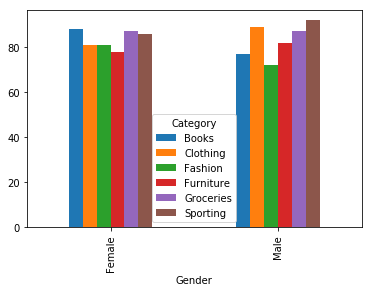

In [33]:
sales.groupby(['Category','Gender']).count()['Quantity'].unstack(level=0).plot(kind='bar')

among females, books category sells more and among males, sporting category sells more

#### 11. which month make more sales?

In [34]:
sales['Month']=pd.to_datetime(sales['Date']).dt.month
sales.head()

,Invoice ID,Date,Time,Gender,Location,City,Member,Category,Price,Quantity,Total,Payment,Rating,Day,Month
0,460489604,1/25/2018,16:46,Male,Brookfield,NewYork,Yes,Groceries,30,1,30,Cash,2,25,1
1,471006167,3/19/2018,16:48,Female,Water tower,Chicago,Yes,Fashion,35,5,175,Card,3,19,3
2,411909258,2/25/2018,13:33,Male,Water tower,Chicago,No,Clothing,57,2,114,Cash,5,25,2
3,487313402,1/22/2018,13:38,Female,Park lane,Dallas,Yes,Sporting,89,4,356,Gpay,1,22,1
4,197763430,2/18/2018,15:31,Female,Park lane,Dallas,No,Books,82,5,410,Cash,4,18,2


In [35]:
sales.groupby('Month').sum()['Total']

Month
1    71652
2    63850
3    72286
Name: Total, dtype: int64

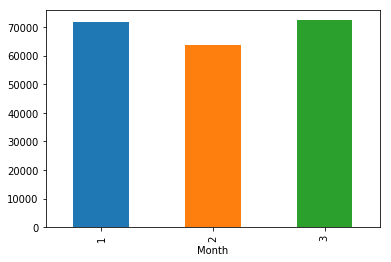

In [36]:
sales.groupby('Month').sum()['Total'].plot(kind='bar')

3rd month make more sales